## Chapter 3. 분류 - Classification 
---
### 3.1 MNIST
### 3.2 이진 분류기 학습 
### 3.3 성능 측정
> #### 3.3.1 교차 검증을 사용한 정확도 측정
> #### 3.3.2 오차 행렬
> #### 3.3.3 정밀도와 재현율
> #### 3.3.4 정밀도/재현율 트레이드오프
> #### 3.3.5 ROC 곡선

### 3.4 다중 분류
### 3.5 에러 분석
### 3.6 다중 레이블 분류 

## 3.1 MNIST
---
### 고등학생과 미국 인구조사국 직원들이 손으로 쓴 70,000개의 작은 숫자 이미지 셋
<img src="https://drive.google.com/uc?id=1iiFEty392Z2xCGxrEbBJgIa5f6k9xfR_" width="400">


In [1]:
from sklearn import datasets
datasets.get_data_home()

'C:\\Users\\jaesang\\scikit_learn_data'

In [2]:
##from sklearn import datasets
##datasets.get_data_home()

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

## Error http://mldata.org/ said that 'service is temporarily down!'

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

- DESCR : 데이터 셋 설명
- data : 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열
- target : 레이블 배열

In [3]:
X,y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

<function matplotlib.pyplot.show(*args, **kw)>

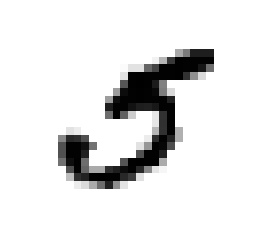

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show

In [6]:
y[36000]

5.0

- 데이터 자세히 보기 전에 항상 Test set 를 만들고, 따로 떼어놓아야한다
- MNIST는 이미 Train set ( 앞쪽 60,000개) 과 Test Set(뒤쪽 10,000개)으로 나누어 두었음

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [8]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
shuffle_index.size

60000

In [10]:
(shuffle_index)

array([39325,  2650, 21031, ..., 49155, 27031, 45138])

## 3.2 이진 분류기 훈련
---
### 숫자 5만 분류하는 이진 분류기 ( Binary-Classification) 를 만들어보자 
### SGD ( stochastic Gradient Desent ) 
> * 매우 큰 데이터셋을 효율적으로 처리하는 장점이 있음
> * 한 번에 하나씩 훈련 샘플을 독립적으로 처리



In [11]:
y_train.dtype

dtype('<f8')

In [12]:
y_train

array([6., 0., 3., ..., 8., 4., 7.])

In [13]:
y_train_5 = (y_train == 5) # 5는 True, 나머지 False
y_test_5 = (y_test == 5)

In [14]:
y_train_5.dtype

dtype('bool')

In [15]:
y_train_5

array([False, False, False, ..., False, False, False])

In [16]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

## 3.3 성능 측정
---
### 3.1 교차 검증을 사용한 정확도 측정

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=5,scoring="accuracy")

array([0.96416965, 0.96608333, 0.9655    , 0.96775   , 0.96791399])

In [20]:
## 흥분 하지말고 모든 이미지가 5라는 분류기를 만들자 

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None ):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [21]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=5,scoring="accuracy")

array([0.91341667, 0.91016667, 0.9045    , 0.9095    , 0.91066667])

- 정확도( Accuracy )는 성능 측정 지표로 선호하지 않음
- 특히, 불균형 데이터셋 ( 즉, 어떤 클래스가 다른 것 보다 월등히 많을 때 ) 
<img src="https://drive.google.com/uc?id=1_tk0c4iZqs-BBXZdiU5ig6-NF8SqN9w7" width="250">


### 3.2 오차 행렬 ( Confusion Matrix ) & 3.1 정밀도와 재현율

- 분류기 성능을 평가하는 더 좋은 방법
- 분류기가 숫자 5의 이미지를 3으로 잘못 분류한 횟수를 알고 싶다면 오차 행렬의 5행 3열을 보면 알 수 있음

In [22]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=5)

- cross_val_predict 은 K-fold Cross Validation 수행하고 평가 점수가 아닌 테스트 fold에서 얻은 예측을 반환 
- 즉,훈련 세트의 모든 샘플에 대해 깨끗한 예측을 얻음 (모델이 룬련한느 동안보지 못했던 데이터에 대해 예측 ) 

In [23]:
y_train_pred.shape

(60000,)

In [24]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)
## target class / predict class 

array([[53886,   693],
       [ 1330,  4091]], dtype=int64)

<img src="https://drive.google.com/uc?id=1Ee0C5F3b7wKfNeAKAVLVg5MzMLdd8LT6" width="500">


- Positive : 5 이다
- Negative : 5가 아니다 

오차행렬 요소
> * TN : 5가 아닌 것을 5가 아니라고 분류 ( 정답 ! ) - 53654
> * TP : 5인 것을 5라고 분류 ( 정답 ! ) - 4116
> * FN : 5인데 5가 아니라고 분류 - 1305
> * FP : 5가 아닌데 5라고 분류 - 925 

#### 정밀도 ( Precision ) 
--- 
> 
> $$ Precision = {TP \over TP+FP}$$
> 예측한 것 중에 제대로 예측한 비율 
> 4116 / ( 925 + 4116 ) = 0.81
> 5로 판별한 이미지중 81%가 정확 

#### 재현율 ( Recall )
---
> 분류기가 정확하게 감지한 Positve의 샘플의 비율
> 민감도 ( Sensitivity ) or 진짜 양성 비율 ( TPR )라고도 함 
> $$ Recall = {TP \over TP+FN}$$
> 4116 / ( 1305 + 4116 ) = 0.75
> 전체 숫자 5 중에 75%만 감지

#### F1 점수

> Precision과 Recall을 하나의 숫자로 만든 숫자 : 정밀도와 재현율의 조화평균 : F1
> Precision과 Recall이 비슷하다면 F1 이 높음
> 상황에 따라 Precision이 중요한 상황 / Recall이 중요한 상황이 있음 

- 높은 정밀도가 필요 
   > 어린아이에게 안전한 동영상을 걸려주는 분류기 ( 좋은 동영상이 제외되더라도 , 안전한 것들만 노출 )
- 높은 재현율이 필요 
    > 감시카메라를 통해 좀도둑잡아내는 분류기
    > 민감한 센서를 만들어두면, 경비원의 잘못된 호출이 빈번하더라도, 거의 모든 좀도둑은 잡을 것 
       




In [26]:
from sklearn.metrics import precision_score, recall_score,f1_score
precision_score(y_train_5,y_train_pred)

0.8551421404682275

In [27]:
recall_score(y_train_5,y_train_pred)

0.7546578122117691

In [28]:
f1_score(y_train_5,y_train_pred)

0.8017638412542871

### 3.4 정밀도와 재현율의 TradeOff

- SGD가 분류를 어떻게 결정했는 지 살펴보자
- 결정 함수 ( decision function ) 을 사용하여 각 샘플의 점수를 구함 
- 이 점수가 Threshold 보다 크면 양성 , 그렇지 않으면 음성
<img src="https://drive.google.com/uc?id=11uYxijqQ9FkPOG3sZBRjl2dyOliADcJ8" width="600">

In [29]:
y_scores =sgd_clf.decision_function([some_digit])
y_scores

array([187944.6500419])

In [30]:
threshold= 90000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [31]:
threshold= 100000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [32]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=5,method="decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve
precisions, recalls , thresholds = precision_recall_curve(y_train_5,y_scores)


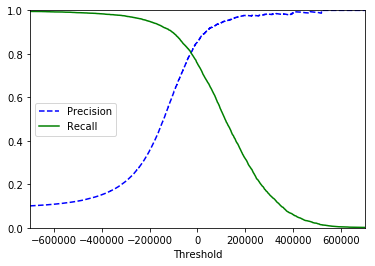

In [34]:

def plot_precision_recall_vs_threshold ( precisions, recalls, thresholds) :
    plt.plot(thresholds, precisions[:-1], "b--",label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    plt.xlim([-700000, 700000])

plot_precision_recall_vs_threshold(precisions, recalls , thresholds)
plt.show()

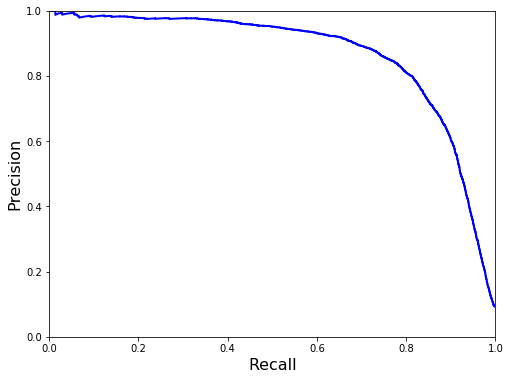

In [35]:
def  plot_precision_vs_recallplot_pre (precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recallplot_pre(precisions, recalls)
plt.show()

### 3.5 ROC 곡선

- 수신기 조작 특성 ( Receiver operating characteristic ) 
- 거짓 양성 비율 ( FPR =  1 - TNR (  특이도 = Specificity ) )에 대한 진짜 양성 비율 ( TPR = Recall ) 
- 민감도 ( Recall ) 에 대한 1- 특이도 그래프


- 특이도 ( Specificity ) 
> - 암환자가 아닌 사람에게 암환자 아니라고 진단 ( True Negative Rate ) 

- TPR : True Positive Rate (=민감도, true accept rate)
> - 맞는 것을 맞다고 할 확률 
> - 1인 케이스에 대해 1로 예측한 비율.(암환자를 진찰해서 암이라고 진단 함)

- FPR :  False Positive Rate (=1-특이도, false accept rate)
> - 틀린 것을 맞다고 할 확률
> - 0인 케이스에 대해 1로 잘못 예측한 비율.(암환자가 아닌데 암이라고 진단 함)


- 민감도 : 1인 케이스에 대해 1이라고 예측한 것.
- 특이도 : 0인 케이스에 대해 0이라고 예측한 것.



In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

In [37]:
fpr

array([0.00000000e+00, 0.00000000e+00, 1.83220653e-05, ...,
       9.92048224e-01, 9.92048224e-01, 1.00000000e+00])

<function matplotlib.pyplot.show(*args, **kw)>

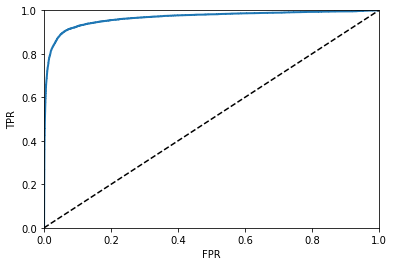

In [38]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    
plot_roc_curve(fpr,tpr)
plt.show

- TradeOff 관계 있음
- 점섬은 완전한 랜덤분류기의 ROC 곡선
- 좋은 분류기는 이 점선으로부터 최대한 멀리 떨어져있어야함 ( 왼쪽 위 모서리로 )

- AUC ( area under the curve )
> - AUC를 측정하면 분류기들을 비교할 수 있음
> - 완벽한 분류기는 ROC의 AUC가 1 이고, 완전 랜덤한 분류기는 0.5

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9659922629105575

- ROC 곡선은 Precision/recall과 비슷해서 어떤 것을 사용해야할지 궁금할 수 있습니다
- Precision/Recall 곡선
    - 양성 클래스가 드물거나 거짓 음성보다 거짓 양성이 중요한 경우 
- 그렇지 않은 ROC 곡선 
- AUC가 96%를 보면 매우 좋은 분류기라고 할 수 잇지만, 사실 5가 아님 (음성) 에 비해 5이다(양성)이 크게 적기 때문!

- 이와 달리 PR 곡선은 분류기의 성능 개선 여지가 얼마나 되는지 잘 보여짐 

c:\users\jaesang\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


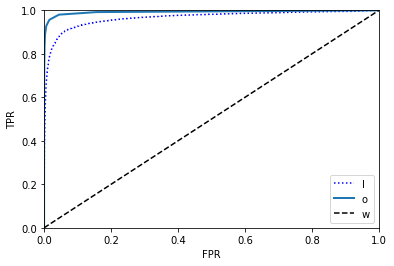

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=5,method="predict_proba")
y_scores_forest = y_probas_forest[:,1]

fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5,y_scores_forest)

plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest, "Random Forest")
plt.legend("lower right")
plt.show()


### 3.4 다중분류

- 둘 이상의 클래스를 구별할 수 있는 다중분류기( Multiclass Classifuer )
- RandomForest, Naive Bayes 분류기 같은 일부 알고리즘은 여러개의 클래스 직접 처리할 수 있음
- SVM, Linear 분류기 같은 다른 알고리즘은 이진 분류만 가능 
- 이진 분류기를 여러개 사용해, 다중 클래스를 분류하는 기법도 많음
1. 일대다 OvA ( one-versus-all , one-versus-the-rest 전략 
> - 특정 숫자 하나만 구별하는 숫자별 이진 분류기 10개 훈련시켜, 클래스가 10개인 숫자 이미지 분류 시스템을 만들 수 있음
> - 각각의 클래스에 대해 표본이 속하는지 속하지 않는지의 이진 클래스 분류 문제를 풀고
> - 각 분류기의 결정점수 중 가장 높은 것을 선택

2. 일대일 OvO ( one-versus-one )
> - 0과 1구별, 0과 2구별,1과2구별 등 각 숫자조합마다 이진분류기 훈련
> - 클래스 N개 라면 N X ( N-1 )/ 2 개 필요 
> - e.g ) MNIST 라면 45개의 분류기 훈련
> - 주요 장점 : 각 분류기의 훈련에 전체 훈련 세트 중 구별할 두 클래스에 해당되는 샘플만 필요 
> - SVM같은 알고리즘은 훈련 세트의 크기에 민감해서, 큰 훈련세트에서 몇개의 분류기를 훈련시키는 것보다 작은 훈련 세트에서 많은 분류기를 훈련시키는 쪽이 빠르기 때문에 OvO 선호

다중 클래스 분류 작업에 이진 분류 알고리즘을 넣으면 sklearn 자동으로 감지해 OvA 적용 

In [41]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5.])

- 내부에서는 sklearn이 실제로 10개의 이진분류기를 훈련시키고 각각의 결정 점수를 얻어 점수가 높은 클래스 선택

In [42]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-323554.7599372 , -378861.82715938, -296286.0462952 ,
        -134021.76312795, -624915.96908904,  187944.6500419 ,
        -749487.2730463 , -292750.54433875, -873286.0848456 ,
        -611567.34960888]])

In [43]:
np.argmax(some_digit_scores)

5

In [44]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [45]:
sgd_clf.classes_[5]

5.0

In [46]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5,random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([5.])

In [47]:
len(ovo_clf.estimators_)

45

In [48]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_jobs=5, random_state=42) ## RandomForest는 직접 다중 클래스로 분류할 수 있음
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5.])

In [49]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [50]:
cross_val_score(sgd_clf,X_train,y_train,cv=5,scoring="accuracy")

array([0.85522699, 0.87135477, 0.83966667, 0.82270568, 0.85003334])

In [65]:
cross_val_score(forest_clf,X_train,y_train,cv=5,scoring="accuracy")

array([0.94652228, 0.93851025, 0.94583333, 0.94365258, 0.94314772])

### 3.5 에러 분석 
- 가능성이 높은 모델을 찾았다고 가정하고 모델의 성능을 향상시킬 방법을 찾아보자
- 그 중 한가지 방법이 에러의 종류를 분석하는 것
- Confusion Matix을 보자 - cross_val_predict 함수를 사용하여 예측값을 만들고 confusion_matrix 함수 호출

In [53]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=5)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5733,    2,   24,   11,   12,   50,   42,    7,   38,    4],
       [   1, 6480,   44,   25,    6,   41,    6,   10,  116,   13],
       [  51,   36, 5339,  103,   81,   27,   88,   57,  162,   14],
       [  48,   39,  141, 5345,    1,  227,   38,   52,  137,  103],
       [  19,   28,   37,    9, 5359,    9,   58,   35,   79,  209],
       [  67,   41,   32,  176,   72, 4602,  112,   28,  179,  112],
       [  32,   25,   51,    2,   40,   89, 5624,    4,   51,    0],
       [  28,   21,   71,   33,   54,   11,    5, 5785,   15,  242],
       [  52,  151,   73,  160,   13,  162,   54,   23, 5021,  142],
       [  44,   31,   30,   91,  152,   31,    3,  183,   72, 5312]],
      dtype=int64)

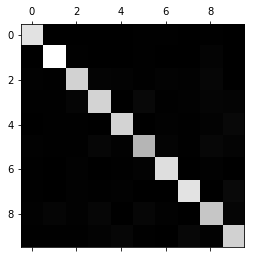

In [54]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

- 배열에서 가장 큰 값은 흰색, 가장 작은값은 검정색
- 5가 다른 색보다 약간 회색을 보임

In [55]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [56]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sums
norm_conf_mx

array([[9.67921661e-01, 3.37666723e-04, 4.05200068e-03, 1.85716698e-03,
        2.02600034e-03, 8.44166807e-03, 7.09100118e-03, 1.18183353e-03,
        6.41566774e-03, 6.75333446e-04],
       [1.48323939e-04, 9.61139128e-01, 6.52625334e-03, 3.70809849e-03,
        8.89943637e-04, 6.08128152e-03, 8.89943637e-04, 1.48323939e-03,
        1.72055770e-02, 1.92821121e-03],
       [8.55991944e-03, 6.04229607e-03, 8.96106076e-01, 1.72876804e-02,
        1.35951662e-02, 4.53172205e-03, 1.47700571e-02, 9.56696878e-03,
        2.71903323e-02, 2.34978181e-03],
       [7.82906541e-03, 6.36111564e-03, 2.29978796e-02, 8.71799054e-01,
        1.63105529e-04, 3.70249551e-02, 6.19801011e-03, 8.48148752e-03,
        2.23454575e-02, 1.67998695e-02],
       [3.25231085e-03, 4.79287915e-03, 6.33344745e-03, 1.54056830e-03,
        9.17322835e-01, 1.54056830e-03, 9.92810681e-03, 5.99109894e-03,
        1.35227662e-02, 3.57754194e-02],
       [1.23593433e-02, 7.56318023e-03, 5.90296993e-03, 3.24663346e-02,
   

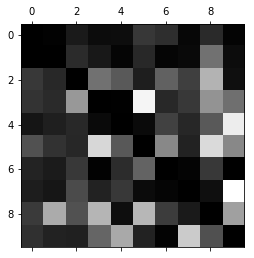

In [57]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx,0) ## 대각선은 0으로 채워 다시 그린다 
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

- 클래스 8과9의 열이 상당히 밝음 = 많은 이미지가 8과 9로 잘못 분류되었다는 것을 암시
- 클래스 8과9의 행도 밝음 = 숫자 8,9가 다른 숫자들과 혼돈이 자주 된다는 것을 암시
- 클래스 1의 열은 매우 어두으므로 숫자 1를 정확하게 분류 ( 몇개는 8로 혼돈된 것 같음 ) 
- 대칭은 아님 ( 5-8 ) 

- 이 오차행렬을 분석하면 분류기 성능 향상 방안에 대한 통찰을 얻을 수 있음 
- 3,5가 서로 혼돈되는 것을 보완하고, 8과9를 더 잘 분류할 수 있도록 개선 



In [58]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

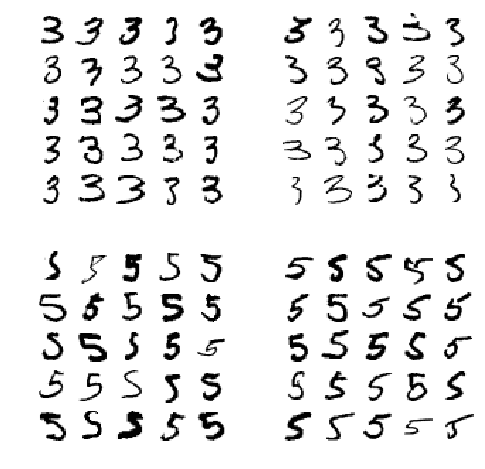

In [59]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

- 왼쪽 5X5 블록 두개는 3으로 분류된 이미지
- 오른쪽 5X5 블록 두개는 5로 분류된 이미지 
- 왜 이런 오분류가 나온 이유는 SGD 선형 모델을 사용했기 때문
- 선형 분류기는 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산
- 따라서 3과5는 몇개의 픽셀만 다르기 때문에 모델이 쉽게 혼동

- 3과5의 차이는 위쪽 선과 아래쪽 호를 이어주는 작은 직선의 위치 
- 3을 쓸 떄 연결부위가 조금 왼쪽에 치우지면 분류기가 5로 분류.. 
- 에러를 줄이는 방법
- 이미지를 중앙에 위치시키고, 회전되어 있지않도록 전처리하는 것 

### 3.6 다중 레이블 분류 

- 지금까지는 각 샘플이 하나의 클래스에서만 항당
- 하지만 분류기가 샘플마다 여러개의 클래스를 출력해야할 때도 있음
- 앨리스,밥, 찰리 세 얼굴을 인식하도록 훈련되었다고 가정하자
- 한 사진에 앨리스와 찰리가 있으면 분류기는 [1,0,1] 출략
- 이처럼 여러개의 이진 레이블을 출력한는 분류 시스템을 다중 레이블 분류( Multilabel Classification ) 시스템입니다

In [60]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] ## 큰 수 인지 ( 7,8,9) / 홀 수 인지 

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
y_multilabel

array([[False, False],
       [False, False],
       [False,  True],
       ...,
       [ True, False],
       [False, False],
       [ True,  True]])

In [62]:
knn_clf.predict([some_digit])

array([[False,  True]])

- 다중 레이블 분류기를 평가하는 방법
- 각 Label의 F1 점수를 구하고 간단하게 평균을 낸다 
- 평균말고 다르게 계산할 수 있음 

In [63]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=5, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9781856948306107

In [64]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9794587179021694